In [9]:
#################################
# Imports
################################

import streamlit as st  # Web App
import pandas as pd  # Dataframes
import numpy as np  # Maths functions
import datetime as dt  # Time Functions
from datetime import datetime

# SQL and Credentials
import os
import io
import dotenv # Protect db creds
dotenv.load_dotenv()
import sqlalchemy

# Charting
from matplotlib import pyplot as plt
import seaborn as sns

# SKLearn
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Mean Squared Error Function (Needs np.sqrt for units)


In [10]:
# load data

# SQL Connection
DATABASE_URL = os.environ.get('HEROKU_POSTGRESQL_PURPLE_URL')
# Cache func for loading Database.
# @st.cache(allow_output_mutation=True)
def get_database_connection():
    engine = sqlalchemy.create_engine(DATABASE_URL)
    query = "SELECT user, recorded_result, pallet_used, near_miss, correct FROM colour_data AS cd WHERE cd.user LIKE 'aFalJQ'"

    # Store db in memory for speed up?
    copy_sql = "COPY ({query}) TO STDOUT WITH CSV {head}".format(
       query=query, head="HEADER"
    )
    conn = engine.raw_connection()
    cur = conn.cursor()
    store = io.StringIO()
    cur.copy_expert(copy_sql, store)
    store.seek(0)
    db = pd.read_csv(store)
    
#     db = pd.read_sql_query('SELECT date, forecast, temp_max, issue, extended_text FROM "bom-weather";',engine)
#     db = pd.read_sql('bom-weather', engine) # Don't need whole db
    return db



In [11]:
db = get_database_connection()

db

,user,recorded_result,pallet_used,near_miss,correct
0,zfgtcbuzkpjiod,No Image,inverse_ring,0,0
1,zfgtcbuzkpjiod,No Image,Plates_6-9,0,0
2,zfgtcbuzkpjiod,No Image,Plates_6-9,0,0
3,zfgtcbuzkpjiod,No Image,Plates_10-13,0,0
4,zfgtcbuzkpjiod,No Image,Plates_14-17,0,0
5,zfgtcbuzkpjiod,C,Plates_18-21,0,0
6,zfgtcbuzkpjiod,E,Plates_22-27P,0,0
7,zfgtcbuzkpjiod,E,Plates_22-27D,0,0
8,zfgtcbuzkpjiod,C,Plates_30-31,0,0
9,zfgtcbuzkpjiod,D,Plates_32-33,0,0


In [15]:
results = db['correct'].groupby(db['pallet_used']).mean()

In [32]:
db.describe()['near_miss'].loc['count']
db.describe()['near_miss'].loc['mean']
db.describe()['near_miss'].loc['std']

0.0

In [ ]:
db.describe()['correct'].loc['count']
db.describe()['correct'].loc['mean']
db.describe()['correct'].loc['std']

In [154]:
df = pd.read_csv('CSV/results-2021-02-06.csv')

In [304]:
df

,user,mask_image,recorded_result,correct,near_miss,ncb,cb_type1,cb_type2,datetime,random_spread,pallet_used,colour_list,counter,baseline
0,_3xz_g,E,B,0,1,1,0,0,2020-12-04 00:16:50,15,bluey,"{""(53,132,188)"",""(21,86,162)"",""(45,144,186)"",""...",1,"{#3282be,#08529c,#3282be,#08529c,#3282be,#0852..."
1,_3xz_g,2,2,1,0,1,0,0,2020-12-04 00:16:56,15,camo2,"{""(247,119,60)"",""(215,59,37)"",""(250,102,69)"",""...",1,"{#fb6a4a,#de2d27,#fb6a4a,#de2d27,#fb6a4a,#de2d..."
2,_3xz_g,C,2,0,0,1,1,0,2020-12-04 00:17:07,15,greys,"{""(246,182,200)"",""(163,44,89)"",""(195,121,145)""...",2,"{#f2bbce,#a43b67,#ce7997,#f2bbce,#a43b67,#ce79..."
3,_3xz_g,No Image,Uncertain,1,0,0,0,0,2020-12-04 00:17:09,15,inverse_ring,"{""(64,67,113)"",""(179,117,132)"",""(150,93,132)"",...",2,"{#3a4c78,#b27180,#95507b,#515267,#314070,#bd4f..."
4,_3xz_g,2,2,1,0,1,0,0,2020-12-04 00:17:32,15,Plates_6-9,"{""(110,141,84)"",""(173,207,89)"",""(99,88,56)"",""(...",3,"{#7d8762,#bcc967,#69603a,#baa955,#ad9556,#bcc9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418,zsGwUw,3,3,1,0,1,1,0,2020-12-03 23:28:19,15,greys,"{""(237,180,219)"",""(175,64,92)"",""(204,128,164)""...",25,"{#f2bbce,#a43b67,#ce7997,#f2bbce,#a43b67,#ce79..."
7419,zsGwUw,1,No Image,0,0,0,0,0,2020-12-03 23:28:27,15,inverse_ring,"{""(65,76,132)"",""(180,116,141)"",""(135,77,116)"",...",26,"{#3a4c78,#b27180,#95507b,#515267,#314070,#bd4f..."
7420,zsGwUw,C,C,1,0,1,0,0,2020-12-03 23:28:37,15,Plates_6-9,"{""(129,131,90)"",""(180,190,103)"",""(97,82,68)"",""...",27,"{#7d8762,#bcc967,#69603a,#baa955,#ad9556,#bcc9..."
7421,zsGwUw,2,2,1,0,1,0,0,2020-12-03 23:28:47,15,Plates_10-13,"{""(190,79,24)"",""(246,177,98)"",""(243,133,73)"",""...",28,"{#bc5325,#f5a957,#e87941,#ff793b,#c74e25,#f970..."


In [155]:
near_miss_scenarios = [("5", "1"), ("B", "2"), ("E", "2"), ("3", "E"), ("3", "B"), ("4", "B"), ("5", "A"), ("B", "E"), ("C", "5"), ("D", "C")]

for row in range(len(df)):
    a = df['recorded_result'].iloc[row]
    b = df['mask_image'].iloc[row]
    near_miss_situation = (a,b)
    
    if (near_miss_situation in near_miss_scenarios) | (near_miss_situation[::-1] in near_miss_scenarios):
        df['near_miss'].iloc[row] = 1
    else:
        df['near_miss'].iloc[row] = 0

/Users/ben.fultongillon/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [156]:
df.describe()

,correct,near_miss,ncb,cb_type1,cb_type2,random_spread,counter
count,7423.000000,7423.000000,7423.000000,7423.000000,7423.000000,7423.0,7423.000000
mean,0.626836,0.062239,0.937357,0.123804,0.186852,15.0,14.507477
std,0.483678,0.241605,0.242336,0.329380,0.389819,0.0,8.804758
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.0,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,15.0,7.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,15.0,14.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,15.0,22.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,15.0,35.000000


In [263]:
df2 = pd.DataFrame(None)
users = list(set(df['user']))
df2['user'] = users

count = []
correct_mean = []
correct_count = []
near_miss_mean = []
near_miss_count = []

for i in users:
    current_user = df[df['user'] == i]
    count.append(current_user['counter'].max())
    correct_mean.append(current_user['correct'].mean())
    correct_count.append(current_user['correct'].count())
    near_miss_mean.append(current_user['near_miss'].mean())
    near_miss_count.append(current_user['near_miss'].count())

df2['count'] = count
df2['correct_mean'] = correct_mean
df2['correct_count'] = correct_count
df2['near_miss_mean'] = near_miss_mean
df2['near_miss_count'] = near_miss_count

bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
df2['correct_mean_bin'] = pd.cut(df2['correct_mean'], bins=bins, labels=labels)
df2['near_miss_mean_bin'] = pd.cut(df2['near_miss_mean'], bins=bins, labels=labels)


In [284]:
df2 = df2.sort_values(by=['count'],ascending=False)
sns.set(rc={'figure.figsize':(15,15)})

In [285]:
df2[:20]

,user,count,correct_mean,correct_count,near_miss_mean,near_miss_count,correct_mean_bin,near_miss_mean_bin
204,EjWh8Q,35,0.750000,36,0.000000,36,70%,NaN
228,LqM7MQ,35,0.285714,70,0.142857,70,20%,10%
217,GHj8ug,35,0.742857,35,0.000000,35,70%,NaN
38,mnTOog,35,0.343284,67,0.119403,67,30%,10%
26,eBOrFg,34,0.705882,34,0.029412,34,70%,0%
243,Xa7V6A,34,0.705882,34,0.058824,34,70%,0%
221,pixYZA,34,0.705882,34,0.029412,34,70%,0%
126,nWCcAQ,34,0.647059,34,0.058824,34,60%,0%
78,VtnJPA,34,0.469388,49,0.020408,49,40%,0%
77,ZL6VHw,34,0.361111,36,0.000000,36,30%,NaN


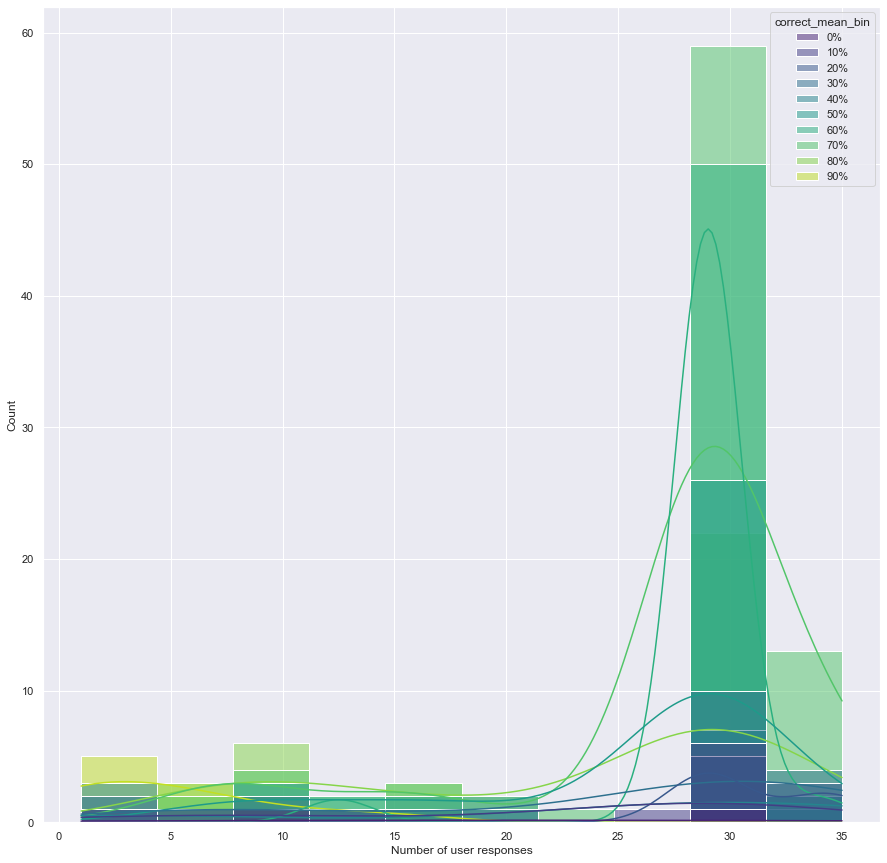

In [301]:
ax = sns.histplot(x='count', data=df2, hue='correct_mean_bin', kde=True, palette='viridis')
ax.set(xlabel="Number of user responses", ylabel = "Count")
ax.plot();

In [302]:
from scipy import stats



In [339]:

users = list(set(df['user']))
responses = ['1', '2', '3', '4', '5', 'A', 'B', 'C', 'D', 'E']

response_counts = pd.DataFrame(df.groupby(df['user'])['recorded_result'].value_counts(normalize=True))

In [367]:
unstacked_counts = response_counts['recorded_result'].unstack()

responses = ['1', '2', '3', '4', '5', 'A', 'B', 'C', 'D', 'E']

unstacked_counts

recorded_result,1,2,3,4,5,A,B,C,D,E,No Image,Uncertain
user,,,,,,,,,,,,
0jfiyA,NaN,0.125000,NaN,0.250000,NaN,0.125000,NaN,NaN,0.125000,0.250000,0.125000,NaN
0q9bQw,0.172414,0.137931,0.034483,0.034483,0.068966,0.034483,0.034483,0.137931,0.034483,0.103448,NaN,0.206897
0wGDfg,NaN,0.137931,0.172414,0.034483,0.034483,0.034483,0.068966,0.068966,0.206897,0.034483,0.206897,NaN
1Jnsqw,0.137931,0.034483,NaN,0.137931,0.137931,0.275862,0.137931,NaN,0.034483,0.034483,0.034483,0.034483
1T39lw,0.032258,0.129032,0.064516,NaN,0.193548,0.096774,NaN,0.161290,NaN,0.129032,0.193548,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
xzENyQ,0.103448,0.137931,NaN,0.137931,0.034483,0.034483,0.172414,0.137931,0.103448,0.034483,0.103448,NaN
zArlJQ,NaN,0.125000,0.125000,NaN,NaN,0.125000,0.125000,0.250000,NaN,0.125000,NaN,0.125000
zbLbsA,0.034483,NaN,0.206897,0.103448,0.068966,0.034483,0.137931,NaN,0.068966,0.068966,0.275862,NaN


In [392]:
df3 = unstacked_counts[~(unstacked_counts[i] < .6)] 


In [393]:
df3

recorded_result,1,2,3,4,5,A,B,C,D,E,No Image,Uncertain
user,,,,,,,,,,,,
0jfiyA,NaN,0.125000,NaN,0.250000,NaN,0.125000,NaN,NaN,0.125000,0.250000,0.125000,NaN
0wGDfg,NaN,0.137931,0.172414,0.034483,0.034483,0.034483,0.068966,0.068966,0.206897,0.034483,0.206897,NaN
1YrKLw,NaN,0.545455,NaN,NaN,NaN,NaN,0.363636,NaN,NaN,NaN,0.090909,NaN
5jgbiA,NaN,0.068966,0.068966,0.068966,NaN,0.034483,0.068966,0.034483,0.172414,NaN,0.482759,NaN
6kYHBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
9TBu8Q,NaN,NaN,0.181818,0.090909,0.151515,0.090909,0.060606,0.030303,0.121212,0.121212,0.151515,NaN
BrfeCw,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0iArA,NaN,NaN,0.111111,NaN,0.444444,NaN,NaN,NaN,NaN,NaN,0.444444,NaN
DfX_-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034483,NaN,NaN,NaN,0.965517


In [363]:
response_counts[(response_counts['recorded_result'] > 0.5) & (response_counts['recorded_result'] != 'No Image' )]

,,recorded_result
user,recorded_result,
1YrKLw,2,0.545455
2uvYZQ,No Image,0.620690
6kYHBA,Uncertain,1.000000
BrfeCw,4,1.000000
DfX_-g,Uncertain,0.965517
FymJdA,3,0.533333
HO3dqg,C,1.000000
HfXwNQ,Uncertain,0.676471
I22saA,No Image,0.655172


In [ ]:
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]